In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
link = 'https://raw.githubusercontent.com/JeevanshuDua/csvfiles/main/Iris.csv'
df = pd.read_csv(link)


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.Species.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

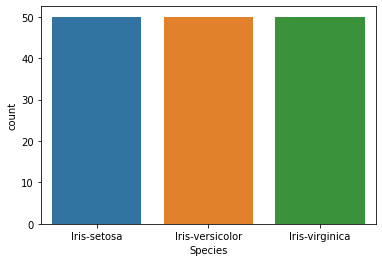

In [6]:
sns.countplot(df.Species)

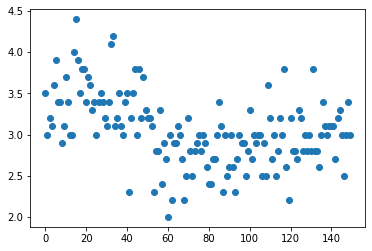

In [7]:
plt.scatter(df.index, df.SepalWidthCm)

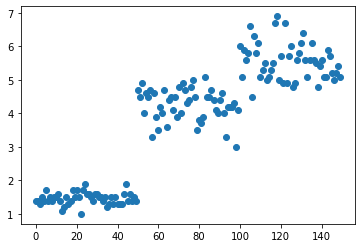

In [8]:
plt.scatter(df.index,df.PetalLengthCm)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='PetalLengthCm'>

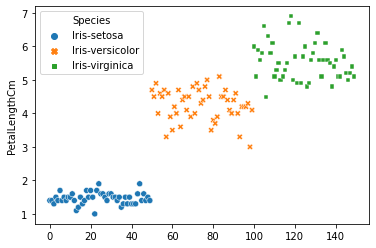

In [9]:
sns.scatterplot(df.index,df.PetalLengthCm, hue='Species', style='Species', data = df)  #hue=color , style=shape

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SepalLengthCm'>

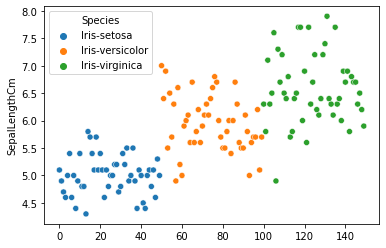

In [11]:
sns.scatterplot(df.index,df.SepalLengthCm, hue='Species',data = df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='PetalWidthCm'>

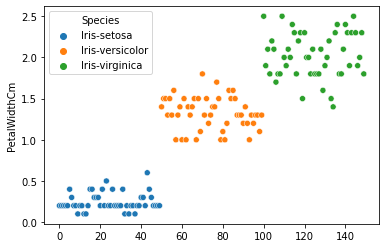

In [12]:
sns.scatterplot(df.index,df.PetalWidthCm,hue='Species', data = df)

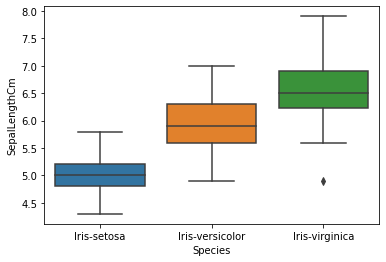

In [13]:
sns.boxplot(x="Species", y="SepalLengthCm", data=df )
plt.show()
# Similarly we can use it on different characterstics as well

## Now we have two methods to apply ML as we can just import the data from the SciKit Data Set too, The reason we did not do that before was just for me to sow you how to plot the data as the saved data in the scikit is more optimised for ML

## What can we do with the data we had above 
### X = df.drop('Species')
### y = df['Species]
### Also, as the species are in an object format we would have to encode those values into integers 

In [14]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [15]:
df.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [16]:
df = df.drop(['Id'], axis = 1)

In [17]:
X = df.drop(['Species'], axis = 1)

In [18]:
y = df['Species']

In [19]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [21]:
from sklearn.model_selection import train_test_split                                      #train size=80%
train_X, test_X,train_y, test_y = train_test_split(X,y,test_size=.2, random_state = 2)   #test size=.2 bcz we are giving 20% data fr testing, random state - we are taking random values

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [25]:
test_X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
6,4.6,3.4,1.4,0.3
3,4.6,3.1,1.5,0.2
113,5.7,2.5,5.0,2.0
12,4.8,3.0,1.4,0.1
24,4.8,3.4,1.9,0.2
129,7.2,3.0,5.8,1.6
25,5.0,3.0,1.6,0.2
108,6.7,2.5,5.8,1.8
128,6.4,2.8,5.6,2.1
45,4.8,3.0,1.4,0.3


In [26]:
pred = knn.predict(test_X)
print('My predicted values',pred)
print('My actual values', test_y)


My predicted values [0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2]
My actual values 6      0
3      0
113    2
12     0
24     0
129    2
25     0
108    2
128    2
45     0
48     0
42     0
35     0
5      0
85     1
54     1
41     0
96     1
144    2
89     1
77     1
74     1
115    2
94     1
87     1
29     0
2      0
127    2
44     0
125    2
Name: Species, dtype: int32


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,test_y)


1.0

In [28]:
my_pred =knn.predict([[1,3,8,4]])    #we have 4 values so giving 4 values to predict 
my_pred

array([2])

In [29]:
encoder.inverse_transform(my_pred)    #which is from  iris virginica (i.e from array 2)

array(['Iris-virginica'], dtype=object)

In [30]:
encoder.inverse_transform(test_y)

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)